In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## Run code on qlua output

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
# job_num = 16069
job_num = 16142
base = './output/' + cfgbase + '_' + str(job_num)

# base = './output/p2222_cfg200'    #just run with one configuration for comparison

props, threepts = analysis.readfile(base)

V = analysis.get_hypervolume()

In [3]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [4]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()

In [31]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
# Z = analysis.get_Z(Zq, Γ, Γ_B)

In [32]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

Two point
[[[[ 1.00747164e+05-9.2370556e-14j  1.52817249e+01+1.2031049e+02j
    -4.83010586e+04+2.1567115e+04j -4.90303438e+04-4.8781703e+04j]
   [-2.41768661e+02-3.9978937e+02j  5.06350021e+01+5.3976643e+01j
     2.78603973e+02+5.3636255e+02j  2.02954819e+02+5.9992596e+02j]
   [-1.01743111e+02-3.4778656e+02j -8.02321472e+01+8.5556152e+01j
     2.88416931e+02+2.4518060e+02j -9.75028809e+02+1.4303291e+02j]]

  [[ 1.52817249e+01-1.2031049e+02j  1.00791047e+05+6.4837025e-14j
    -4.88299414e+04+4.8661328e+04j  4.83052891e+04+2.1708205e+04j]
   [ 3.47097855e+01+3.6376348e+00j -5.70164490e+01-2.9714655e+02j
     4.63170868e+02+3.3301297e+02j -2.54542145e+02+3.2249100e+02j]
   [ 2.03982029e+01-1.1234162e+02j -4.06120491e+01-3.9255643e+02j
     6.54067566e+02+9.6427948e+01j -5.29077820e+02+1.2501154e+02j]]

  [[ 4.83010586e+04+2.1567115e+04j  4.88299414e+04+4.8661328e+04j
     1.00654672e+05+7.5495166e-14j -1.00547302e+02-1.7762644e+01j]
   [-7.96330872e+02+3.4031873e+02j  7.96219206e+00-2.77

In [33]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p1112': (-11.162624-1.1916304e-08j), 'p1114': (-14.793589+2.6791145e-08j), 'p1116': (-16.799261+1.9088318e-08j), 'p1118': (-18.740131+4.346397e-08j), 'p11110': (-21.25143-6.9729276e-09j), 'p2222': (-8.388186+4.9982553e-08j), 'p2224': (-11.932797+1.341057e-07j), 'p2226': (-14.4990015+6.740122e-08j), 'p2228': (-16.749352+1.2949518e-07j), 'p22210': (-19.305025-2.3344969e-08j), 'p3332': (-7.926485-2.1126523e-09j), 'p3334': (-10.552404-2.5833877e-08j), 'p3336': (-13.031833-7.031246e-08j), 'p3338': (-15.36271-9.47466e-08j), 'p33310': (-17.953144+8.494294e-08j), 'p4444': (-10.68093-2.748839e-08j), 'p4446': (-12.763647+1.0849342e-07j), 'p4448': (-14.934323+4.287723e-08j), 'p44410': (-17.431368-6.6459336e-08j), 'p5554': (-12.36553-2.4745377e-08j), 'p5556': (-13.901946-4.3047997e-08j), 'p5558': (-15.731843+4.432715e-08j), 'p55510': (-18.027563-3.3761964e-08j), 'p6666': (-17.079626-9.825704e-08j), 'p6668': (-18.245224-7.334702e-08j), 'p66610': (-20.164757+1.3693195e-08j), 'p7776': (-24.388994+1

<IPython.core.display.Javascript object>


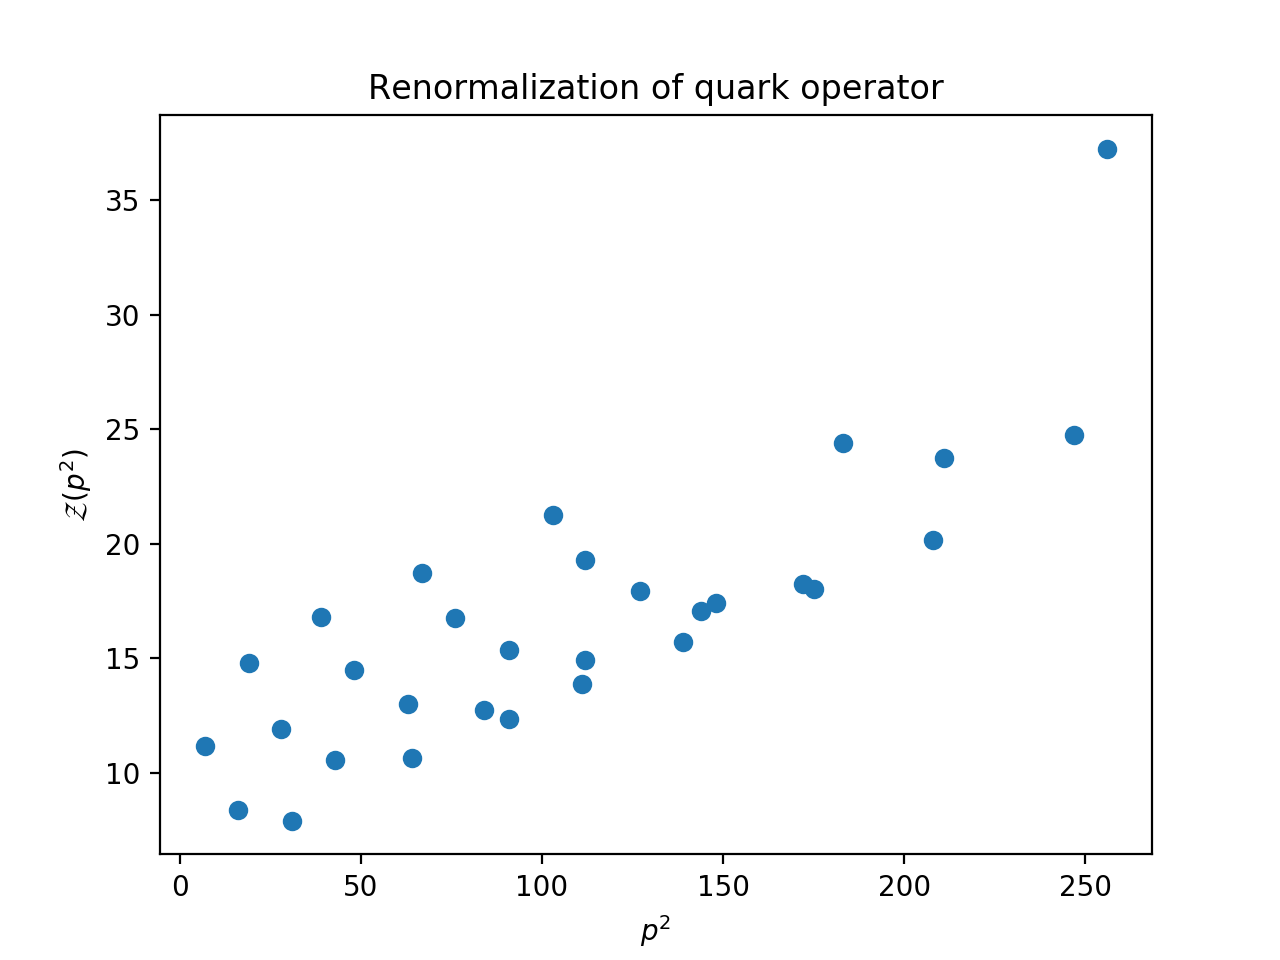

In [34]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$p^2$')
plt.title('Renormalization of quark operator')
plt.show()

In [9]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_16142/renorm_constant_zoomed_error.png')

In [10]:
Z['p2222'].shape

(200, 34)

In [12]:
cfg_list, err, means = analysis.error_analysis(Z, 4, 4)

In [19]:
Z['p2222']

array([[0.5245111 -3.8076582e-09j, 0.5245111 -3.8076582e-09j,
        0.5243288 -1.2636215e-08j, ..., 0.52332145-1.7648201e-08j,
        0.52410567-1.2676124e-08j, 0.52494556+3.3499359e-18j],
       [0.52501845+2.5428639e-09j, 0.5242541 +3.7946304e-09j,
        0.52501714-6.6979759e-18j, ..., 0.52343553+1.0121803e-08j,
        0.52525157+8.9097734e-09j, 0.5242541 +3.7946304e-09j],
       [0.5243288 -1.2636215e-08j, 0.52404696+1.2638721e-08j,
        0.52501845+2.5428639e-09j, ..., 0.5249365 -1.6525762e-08j,
        0.5239263 -6.3395027e-09j, 0.5243288 -1.2636215e-08j],
       ...,
       [0.52487993-2.5381639e-09j, 0.52525157+8.9097734e-09j,
        0.52501845+2.5428639e-09j, ..., 0.52343553+1.0121803e-08j,
        0.5235828 +3.7926151e-09j, 0.52340716-2.0189791e-08j],
       [0.52494556+3.3499359e-18j, 0.5235738 -2.5278342e-09j,
        0.52306545-5.0450932e-09j, ..., 0.5249365 -1.6525762e-08j,
        0.5239263 -6.3395027e-09j, 0.52391636+1.7709345e-08j],
       [0.52501845+2.5428639

<IPython.core.display.Javascript object>


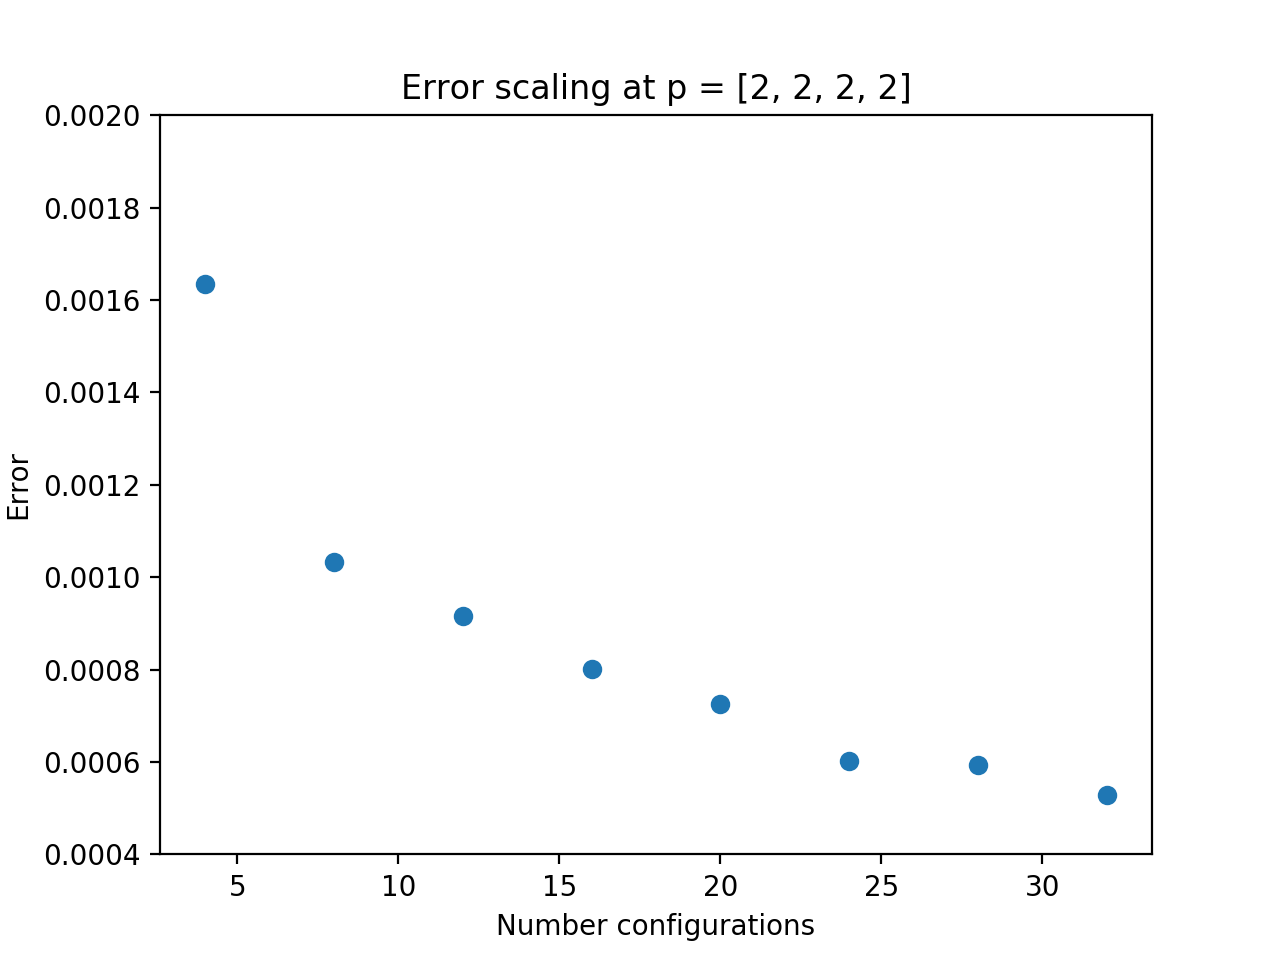

In [17]:
plt.figure()
plt.scatter(cfg_list, err)
plt.title('Error scaling at p = [2, 2, 2, 2]')
plt.xlabel('Number configurations')
plt.ylabel('Error')
plt.ylim((.0004, .002))
plt.show()